In [16]:
!pip install opencv-python


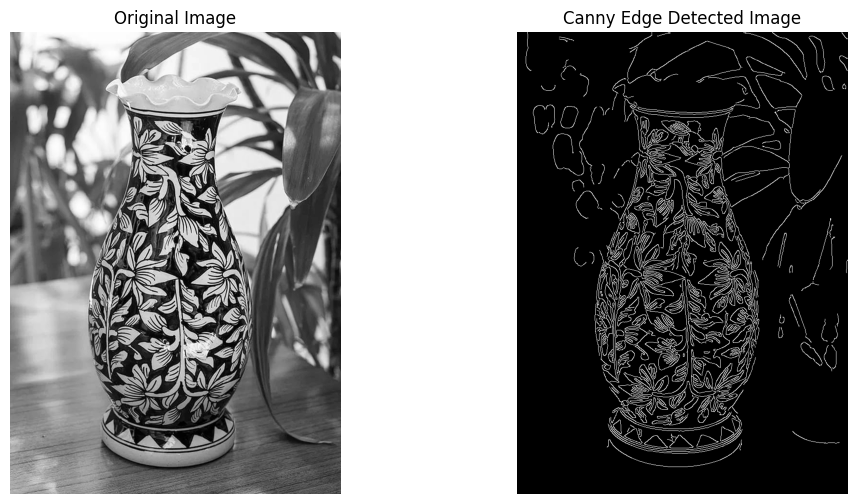

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/sample_data/flower_vase.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found")
    exit()

blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

edges = cv2.Canny(blurred_image, 100, 200)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detected Image')
plt.axis('off')

plt.show()


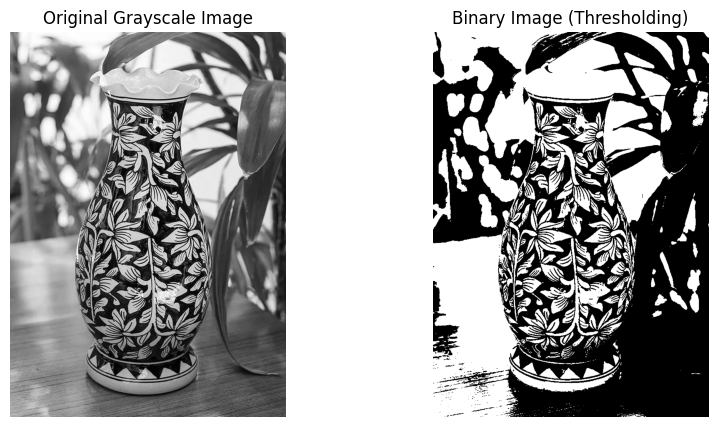

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image = cv2.imread('/content/sample_data/flower_vase.jpg', cv2.IMREAD_GRAYSCALE)

# Define a threshold value
threshold_value = 128

# Apply simple thresholding
_, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Adaptive binary
adaptive_binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)


#Otsu's thresholding
_, otsu_binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


# Display the original and binary images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
# plt.imshow(binary_image, cmap='gray')
plt.imshow(otsu_binary, cmap='gray')
plt.title('Binary Image (Thresholding)')
plt.axis('off')

plt.show()
print(otsu_binary)

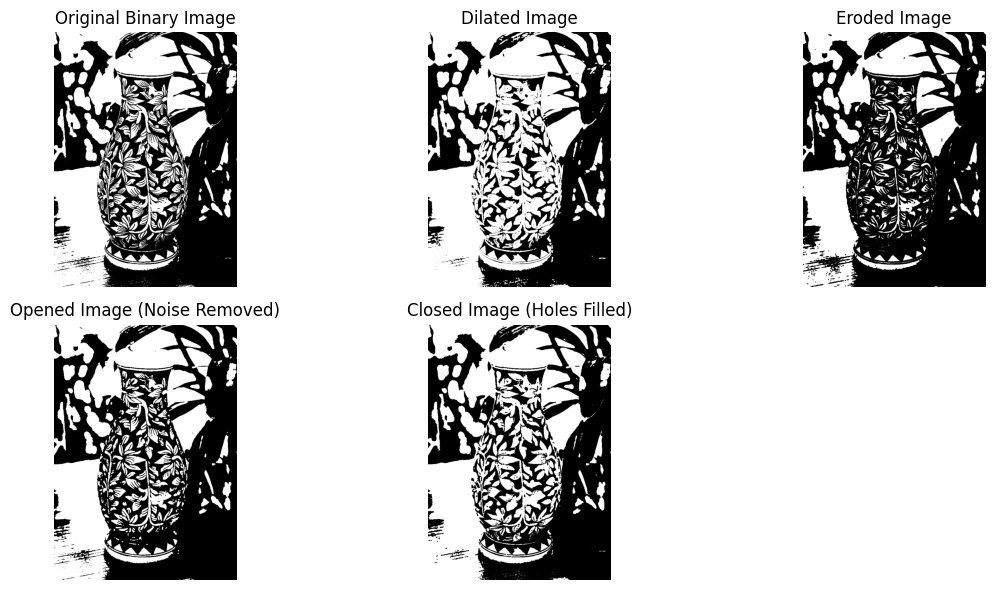

In [19]:
#Morphological operations
import numpy as np


kernel = np.ones((3,3), np.uint8)
dilated_image = cv2.dilate(otsu_binary, kernel, iterations=1)
eroded_image = cv2.erode(otsu_binary, kernel, iterations=1)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)


# Plot the results
plt.figure(figsize=(12, 6))

# Original Binary Image
plt.subplot(231)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

# Dilated Image
plt.subplot(232)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Eroded Image
plt.subplot(233)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Opened Image
plt.subplot(234)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image (Noise Removed)')
plt.axis('off')

# Closed Image
plt.subplot(235)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image (Holes Filled)')
plt.axis('off')

plt.tight_layout()
plt.show()

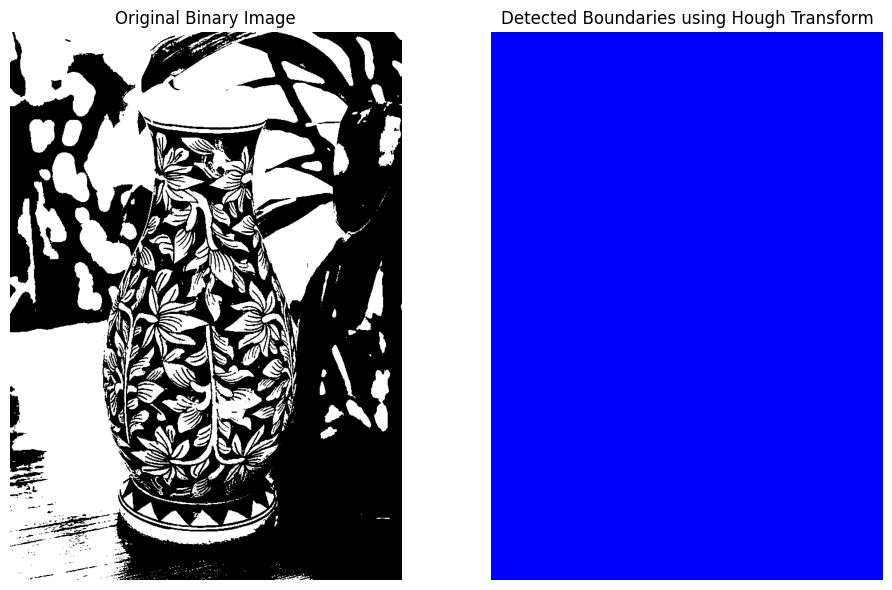

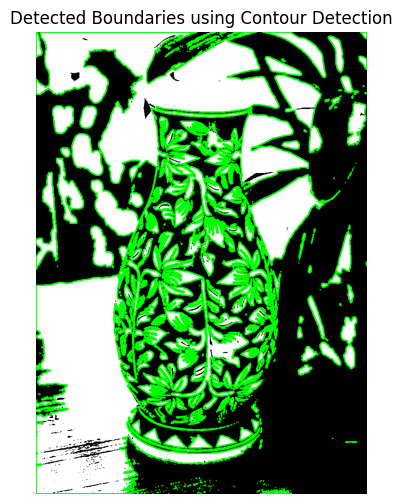

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = otsu_binary



lines = cv2.HoughLines(image, 1, np.pi / 180, 100)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

hough_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.subplot(1, 2, 2)
plt.imshow(hough_image)
plt.title('Detected Boundaries using Hough Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 6))
plt.imshow(contour_image)
plt.title('Detected Boundaries using Contour Detection')
plt.axis('off')
plt.show()


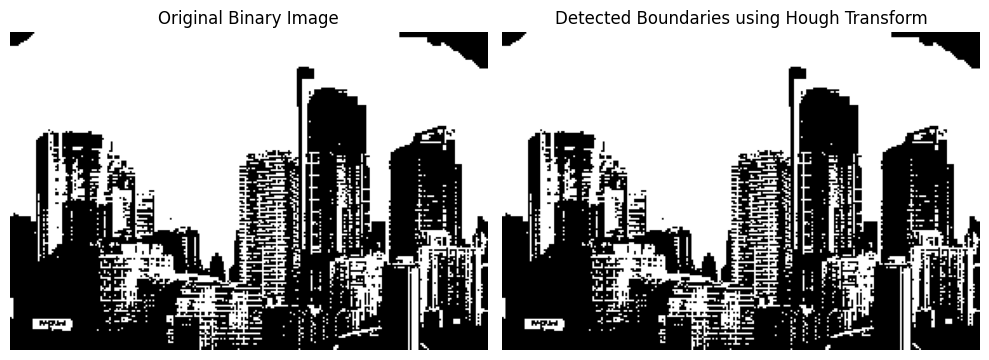

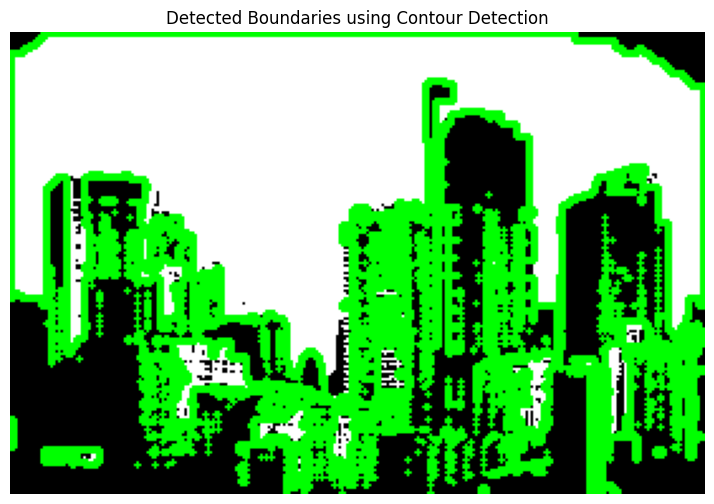

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the binary image
# Replace 'binary_image.png' with the path to your binary image
image = cv2.imread('/content/sample_data/building.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply a binary threshold (in case the image is not already binary)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Detect edges using Canny edge detector (optional if the image already has edges)
edges = cv2.Canny(binary_image, 50, 150, apertureSize=3)

# Hough Transform: Detect straight lines in the binary image
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

# Plot the original binary image and lines detected by Hough Transform
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(binary_image, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

# Create a copy of the image for drawing lines
hough_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)

# Draw lines on the image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.subplot(1, 2, 2)
plt.imshow(hough_image)
plt.title('Detected Boundaries using Hough Transform')
plt.axis('off')

plt.tight_layout()
plt.show()

# Optionally, you can also detect contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the binary image
contour_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

# Display the contours
plt.figure(figsize=(10, 6))
plt.imshow(contour_image)
plt.title('Detected Boundaries using Contour Detection')
plt.axis('off')
plt.show()
